In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("./Student_depression_dataset.csv")



df.drop(columns=['Work Pressure'], inplace=True)
df.drop(columns=['Job Satisfaction'], inplace=True)
df.drop(columns=['Degree'], inplace=True)
df.drop(columns=['City'], inplace=True)
# Define the mapping dictionary
sleep_mapping = {
    "Less than 5 hours": 4,
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 9
}

binary_mapping = {"Yes": 1, "No": 0}

# Convert the 'Have you ever had suicidal thoughts ?' column
df["Have you ever had suicidal thoughts ?"] = df["Have you ever had suicidal thoughts ?"].str.strip().map(binary_mapping)

# Convert the 'Family History of Mental Illness' column
df["Family History of Mental Illness"] = df["Family History of Mental Illness"].str.strip().map(binary_mapping)

df['Sleep Duration'] = df['Sleep Duration'].map(sleep_mapping)


print(df.head())




   id  Gender   Age Profession  Academic Pressure  CGPA  Study Satisfaction  \
0   2    Male  33.0    Student                5.0  8.97                 2.0   
1   8  Female  24.0    Student                2.0  5.90                 5.0   
2  26    Male  31.0    Student                3.0  7.03                 5.0   
3  30  Female  28.0    Student                3.0  5.59                 2.0   
4  32  Female  25.0    Student                4.0  8.13                 3.0   

   Sleep Duration Dietary Habits  Have you ever had suicidal thoughts ?  \
0             5.5        Healthy                                      1   
1             5.5       Moderate                                      0   
2             4.0        Healthy                                      0   
3             7.5       Moderate                                      1   
4             5.5       Moderate                                      1   

   Work/Study Hours  Financial Stress  Family History of Mental Illness  \

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   CGPA                                   27901 non-null  float64
 6   Study Satisfaction                     27901 non-null  float64
 7   Sleep Duration                         27883 non-null  float64
 8   Dietary Habits                         27901 non-null  object 
 9   Have you ever had suicidal thoughts ?  27901 non-null  int64  
 10  Work/Study Hours                       27901 non-null  float64
 11  Fi

In [3]:
print("\nSummary Statistics:")
print(df.describe())


 
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())




Summary Statistics:
                  id           Age  Academic Pressure          CGPA  \
count   27901.000000  27901.000000       27901.000000  27901.000000   
mean    70442.149421     25.822300           3.141214      7.656104   
std     40641.175216      4.905687           1.381465      1.470707   
min         2.000000     18.000000           0.000000      0.000000   
25%     35039.000000     21.000000           2.000000      6.290000   
50%     70684.000000     25.000000           3.000000      7.770000   
75%    105818.000000     30.000000           4.000000      8.920000   
max    140699.000000     59.000000           5.000000     10.000000   

       Study Satisfaction  Sleep Duration  \
count        27901.000000     27883.00000   
mean             2.943837         6.33854   
std              1.361148         1.91748   
min              0.000000         4.00000   
25%              2.000000         4.00000   
50%              3.000000         5.50000   
75%              4.00000

In [4]:

# Filling in the missing values with the median
median_financial_stress = df['Financial Stress'].median()
df['Financial Stress'] = df['Financial Stress'].fillna(median_financial_stress)


median_sleep = df['Sleep Duration'].median()
df['Sleep Duration'] = df['Sleep Duration'].fillna(median_sleep)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
id                                       0
Gender                                   0
Age                                      0
Profession                               0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


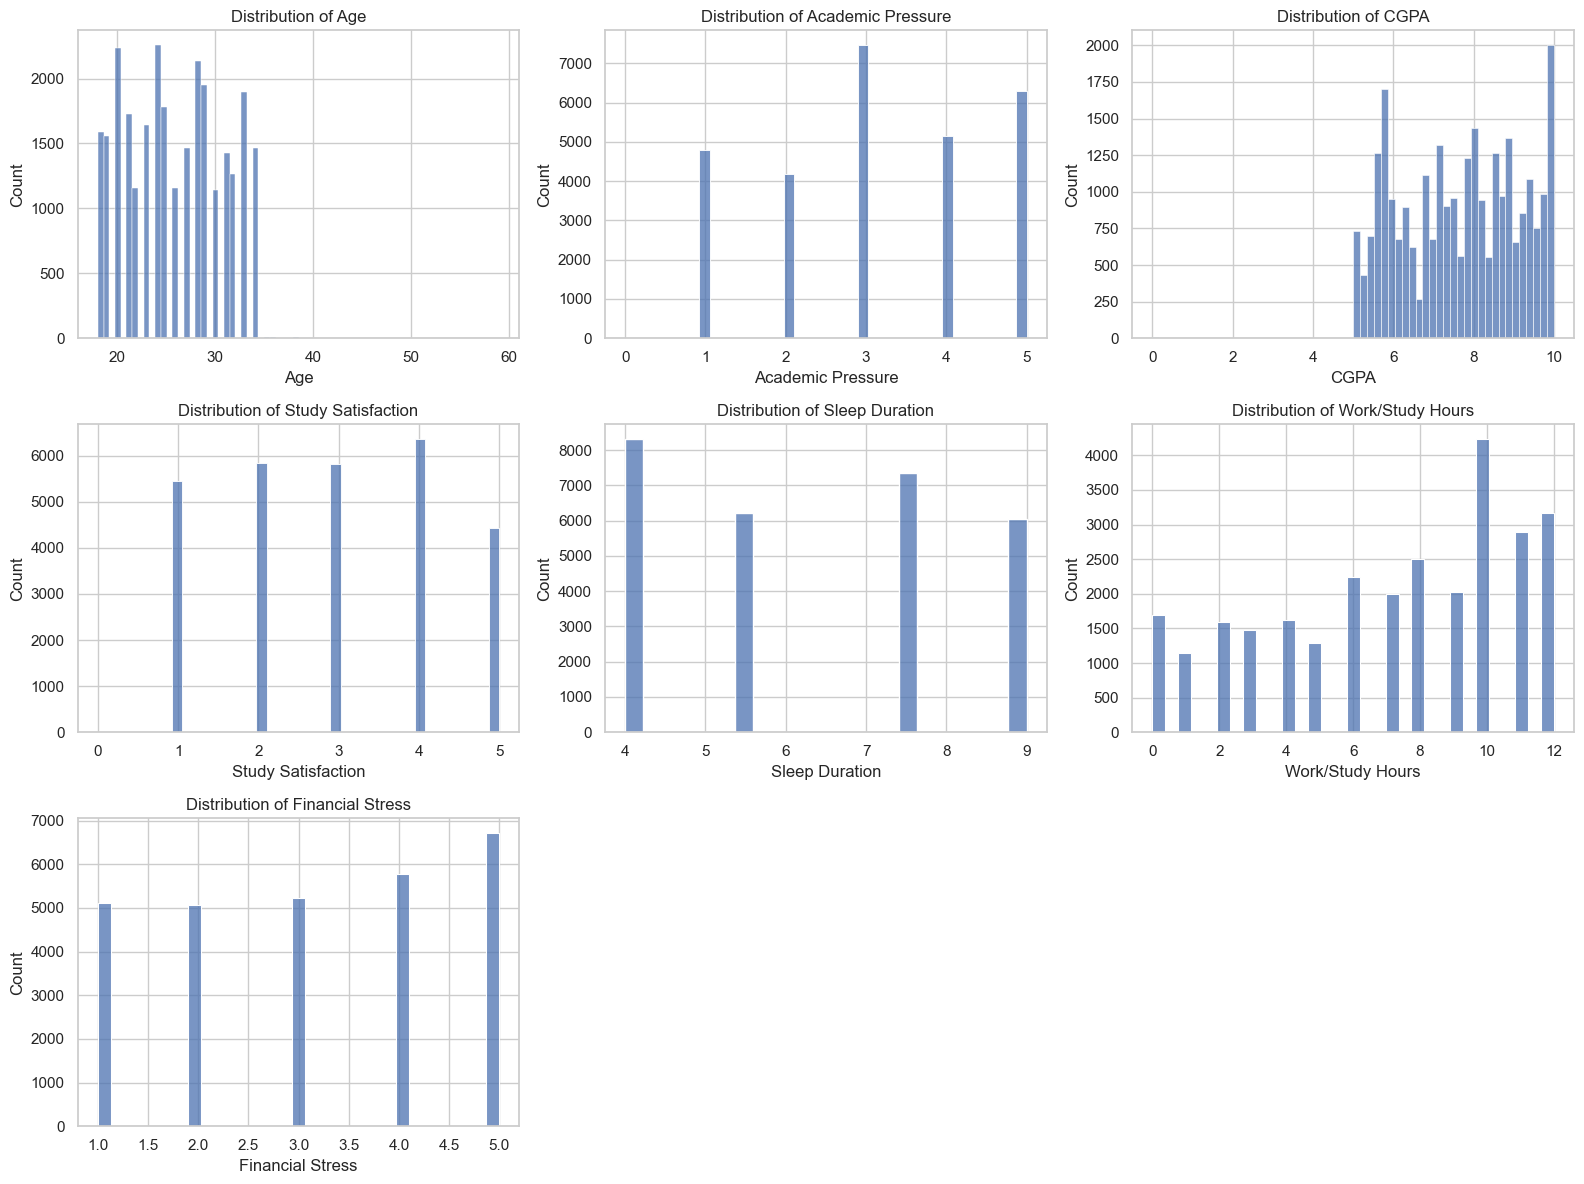

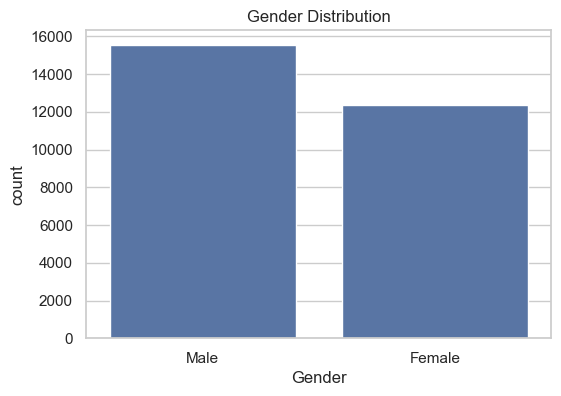

In [5]:
#2 Data Visualizatoin

import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for all plots
sns.set(style="whitegrid", context="notebook")

# List of continuous columns to analyze
continuous_vars = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress']

# Plot histograms for continuous variables
plt.figure(figsize=(16, 12))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=False)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Bar plot for a categorical variable, e.g., Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


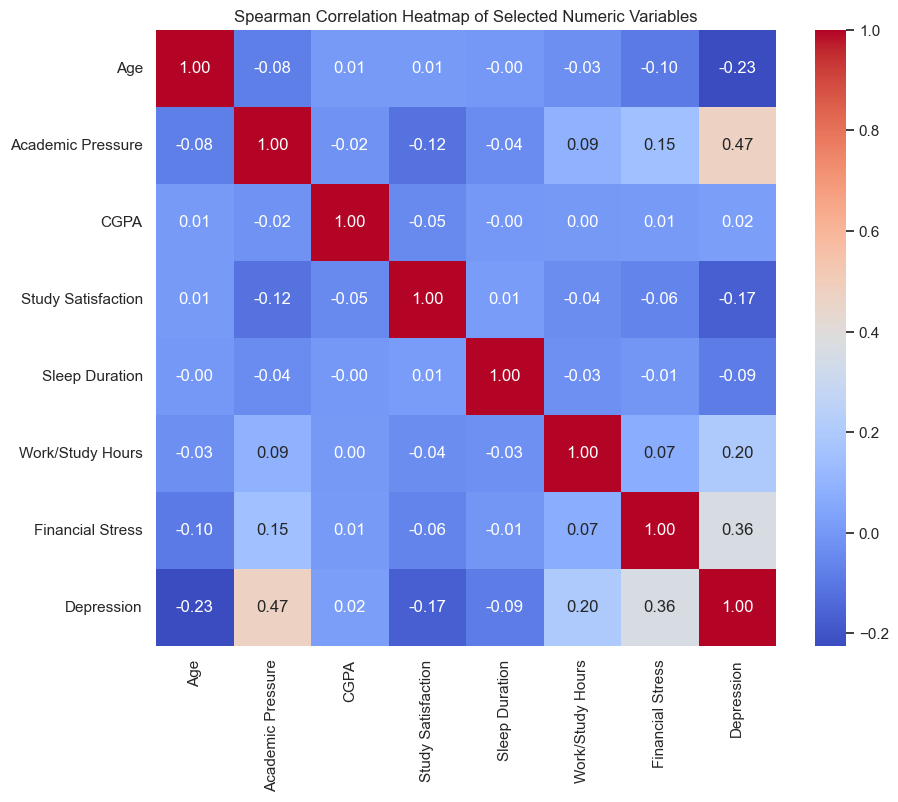

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a list of columns that are numeric or ordinal and relevant for correlation
numeric_cols = [
    'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 
     'Sleep Duration', 'Work/Study Hours', 
    'Financial Stress', 'Depression'
]

# Compute the Spearman correlation matrix
corr_matrix = df[numeric_cols].corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap of Selected Numeric Variables")
plt.show()




<Figure size 800x600 with 0 Axes>

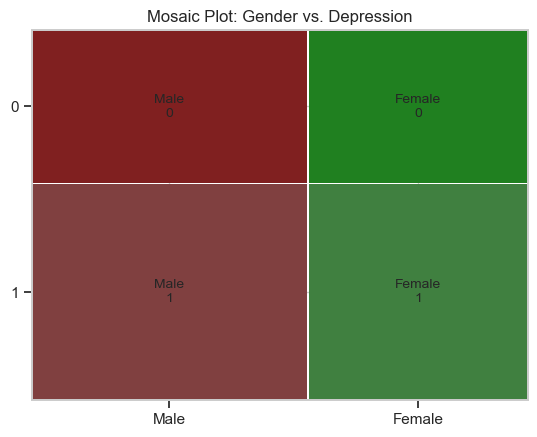

<Figure size 800x600 with 0 Axes>

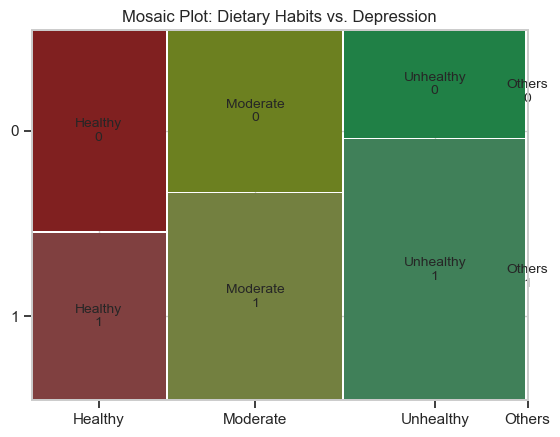

<Figure size 800x600 with 0 Axes>

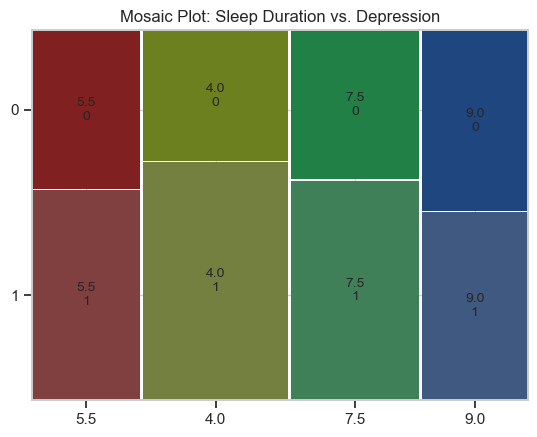

<Figure size 800x600 with 0 Axes>

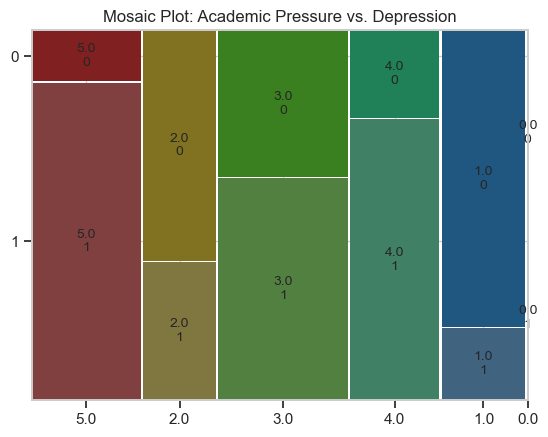

In [7]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# List of categorical variables to analyze
categorical_vars = [
    'Gender','Dietary Habits',  
    'Sleep Duration', 'Academic Pressure',
]

for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    mosaic(df, [var, 'Depression'])
    plt.title(f'Mosaic Plot: {var} vs. Depression')
    plt.show()


In [8]:
import pandas as pd
import scipy.stats as stats

# Assuming df is already loaded
# Map "Dietary Habits" to numeric values
dietary_mapping = {"Healthy": 1, "Moderate": 2, "Others": 3, "Unhealthy": 4}
df["Dietary Habits"] = df["Dietary Habits"].map(dietary_mapping)

# Define the features for ANOVA
anova_features = ["Sleep Duration", "Dietary Habits", "Academic Pressure", "CGPA", "Work/Study Hours"]

anova_results = {}

# Loop over each feature and perform a one-way ANOVA comparing Depression groups
for feature in anova_features:
    # Create a list of arrays: one array per Depression group (0 and 1)
    groups = [df[df["Depression"] == d][feature].dropna() for d in df["Depression"].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results[feature] = {"F-Statistic": f_stat, "P-Value": p_value}

# Convert the results to a DataFrame for easier viewing
anova_df = pd.DataFrame.from_dict(anova_results, orient="index")
print("ANOVA Results:")
print(anova_df)


ANOVA Results:
                   F-Statistic        P-Value
Sleep Duration      198.755039   5.572634e-45
Dietary Habits     1243.991939  1.211740e-266
Academic Pressure  8121.471807   0.000000e+00
CGPA                 13.769509   2.070646e-04
Work/Study Hours   1268.752140  8.598086e-272


In [9]:
import pandas as pd
import scipy.stats as stats

# List of categorical variables to test against Depression
categorical_vars = [
    'Gender', 'Dietary Habits',
    'Have you ever had suicidal thoughts ?', 
    'Family History of Mental Illness', 'Sleep Duration'
]

for var in categorical_vars:
    print(f"Chi-square test for {var} vs. Depression:")
    # Create contingency table
    contingency_table = pd.crosstab(df[var], df['Depression'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi2 Statistic: {chi2:.4f}")
    print(f"P-value: {p:.4e}")
    print(f"Degrees of Freedom: {dof}")
    print("Contingency Table:")
    print(contingency_table)
    print("\n")


Chi-square test for Gender vs. Depression:
Chi2 Statistic: 0.0827
P-value: 7.7373e-01
Degrees of Freedom: 1
Contingency Table:
Depression     0     1
Gender                
Female      5133  7221
Male        6432  9115


Chi-square test for Dietary Habits vs. Depression:
Chi2 Statistic: 1202.6382
P-value: 1.9625e-260
Degrees of Freedom: 3
Contingency Table:
Depression         0     1
Dietary Habits            
1               4178  3473
2               4363  5558
3                  4     8
4               3020  7297


Chi-square test for Have you ever had suicidal thoughts ? vs. Depression:
Chi2 Statistic: 8323.8664
P-value: 0.0000e+00
Degrees of Freedom: 1
Contingency Table:
Depression                                0      1
Have you ever had suicidal thoughts ?             
0                                      7866   2379
1                                      3699  13957


Chi-square test for Family History of Mental Illness vs. Depression:
Chi2 Statistic: 79.4344
P-value: 4.9850e

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Define selected features and target (Gender added)
selected_features = [
    'Academic Pressure', 'Work/Study Hours', 'Financial Stress',
    'Dietary Habits', 'Sleep Duration', 'Family History of Mental Illness',
    'Have you ever had suicidal thoughts ?', 'CGPA', 'Gender'
]
X = df[selected_features].copy()
y = df['Depression']

# Define which features are continuous and which are categorical.
continuous_features = ['Academic Pressure', 'Work/Study Hours', 'Financial Stress', 'Sleep Duration', 'CGPA']
categorical_features = ['Dietary Habits', 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?', 'Gender']

# Create a pipeline for continuous features:
# 1. Scale the features using StandardScaler.
# 2. Apply PCA to reduce dimensionality while retaining 95% of the variance.
continuous_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))  # Retain components that explain 95% of variance.
])

# For categorical features, convert strings into numeric dummy variables using OneHotEncoder.
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine the pipelines using ColumnTransformer.
preprocessor = ColumnTransformer([
    ('cont', continuous_pipeline, continuous_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Create the full pipeline with preprocessor and Logistic Regression.
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# Define a grid for hyperparameter tuning.
# Here we also tune the polynomial degree on continuous features if desired.
param_grid = {
    'preprocessor__cont__pca__n_components': [0.90, 0.95, 0.99],  # Try different variance thresholds.
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear', 'saga']
}

# Split the data.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Run GridSearchCV for hyperparameter tuning.
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV F1 Score:", grid_search.best_score_)

# Evaluate on test set using the default threshold of 0.5.
y_pred_default = grid_search.best_estimator_.predict(X_test)
print("\nLogistic Regression (with PCA) Test Results (Threshold=0.5):")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("F1 Score:", f1_score(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))

# ---------------------------
# OPTIONAL: CHANGE THE THRESHOLD TO 0.38
# ---------------------------
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
threshold = 0.395
y_pred_038 = (y_prob >= threshold).astype(int)

print(f"\nLogistic Regression (with PCA) Test Results (Threshold={threshold}):")
print("Accuracy:", accuracy_score(y_test, y_pred_038))
print("F1 Score:", f1_score(y_test, y_pred_038))
print(classification_report(y_test, y_pred_038))


Best parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear', 'preprocessor__cont__pca__n_components': 0.9}
Best CV F1 Score: 0.8561356632606323

Logistic Regression (with PCA) Test Results (Threshold=0.5):
Accuracy: 0.8308546855402258
F1 Score: 0.8527301092043682
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      2313
           1       0.87      0.84      0.85      3268

    accuracy                           0.83      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.83      0.83      0.83      5581


Logistic Regression (with PCA) Test Results (Threshold=0.395):
Accuracy: 0.8328256584841426
F1 Score: 0.8612226684515841
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      2313
           1       0.84      0.89      0.86      3268

    accuracy                           0.83      5581
   macro avg       0.83      0.82     

Confusion Matrix:
[[1753  560]
 [ 373 2895]]


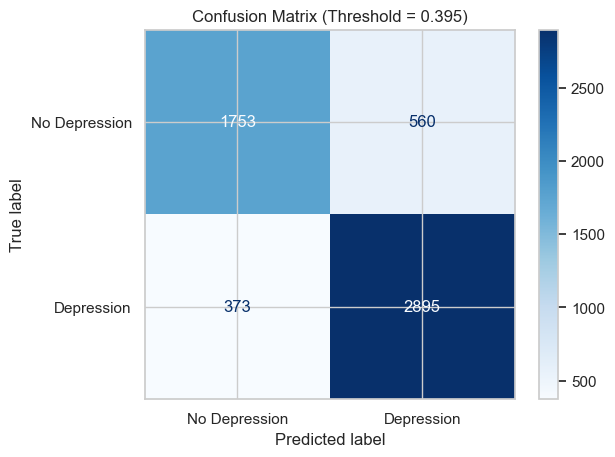

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use the predictions from your custom threshold model
cm = confusion_matrix(y_test, y_pred_038)

print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No Depression', 'Depression'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Threshold = 0.395)")
plt.show()


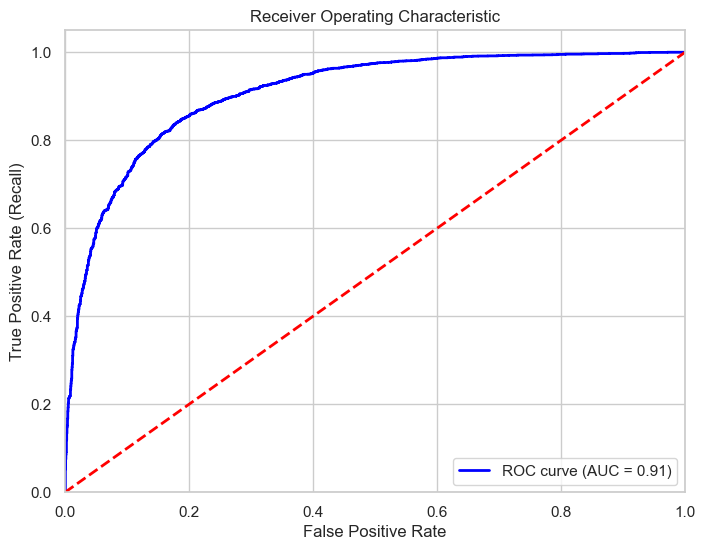

Optimal threshold (maximizing F1): 0.39531732316897306
At optimal threshold:
Precision: 0.8381586566299942
Recall: 0.8858629130966952
F1 Score: 0.8613507884558167


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score

# Get predicted probabilities for the positive class from your best model.
# Assuming you are using the best logistic regression estimator from your GridSearchCV
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute F1-score for each threshold, then select the threshold that maximizes F1
f1_scores = []
for t in thresholds:
    y_pred_temp = (y_prob >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_temp))

optimal_threshold = thresholds[np.argmax(f1_scores)]
print("Optimal threshold (maximizing F1):", optimal_threshold)

# Check precision and recall at the optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)
precision_opt = precision_score(y_test, y_pred_optimal)
recall_opt = recall_score(y_test, y_pred_optimal)
f1_opt = f1_score(y_test, y_pred_optimal)

print("At optimal threshold:")
print("Precision:", precision_opt)
print("Recall:", recall_opt)
print("F1 Score:", f1_opt)


In [31]:
# Found out that dietary habit 3 is making noise since only 12 people had that. Combined it with dietary habit 4 to reduce noise

print(df['Dietary Habits'].value_counts())


# Check unique values before merging
print("Before merging, Dietary Habits categories:", df['Dietary Habits'].unique())

# Merge category 3 into category 4
df['Dietary Habits'] = df['Dietary Habits'].replace({0: 1})

# Check unique values after merging
print("After merging, Dietary Habits categories:", df['Dietary Habits'].unique())



print("Before merging, Academic Pressure:", df['Academic Pressure'].unique())

# Merge category 3 into category 4
df['Academic Pressure'] = df['Academic Pressure'].replace({0: 1})

# Check unique values after merging
print("After merging, Academic Pressure categories:", df['Academic Pressure'].unique())


Dietary Habits
4    10329
2     9921
1     7651
Name: count, dtype: int64
Before merging, Dietary Habits categories: [1 2 4]
After merging, Dietary Habits categories: [1 2 4]
Before merging, Academic Pressure: [5. 2. 3. 4. 1. 0.]
After merging, Academic Pressure categories: [5. 2. 3. 4. 1.]


Random Forest with PCA Best Parameters: {'rf__n_estimators': 500, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 5, 'rf__max_depth': 15, 'rf__bootstrap': True}
Random Forest with PCA Accuracy (Threshold=0.6): 0.8927637002257983
Random Forest with PCA F1 Score (Threshold=0.6): 0.9061303884043421

Random Forest with PCA Classification Report (Threshold=0.6):
              precision    recall  f1-score   support

           0       0.85      0.91      0.87     11565
           1       0.93      0.88      0.91     16336

    accuracy                           0.89     27901
   macro avg       0.89      0.89      0.89     27901
weighted avg       0.90      0.89      0.89     27901

Confusion Matrix (Threshold=0.6):
[[10468  1097]
 [ 1895 14441]]


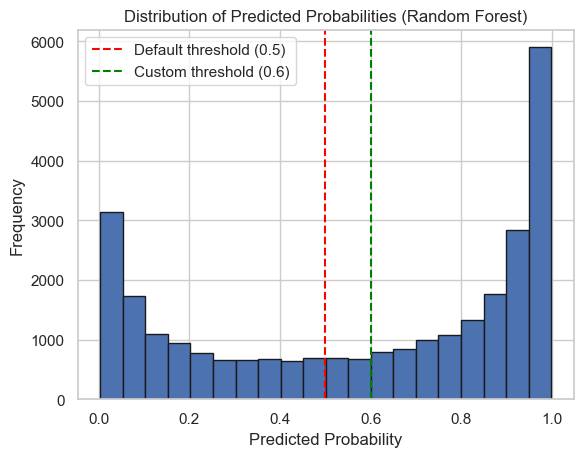

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Define selected features and target
selected_features = [
    'Academic Pressure', 'Work/Study Hours', 'Financial Stress',
    'Dietary Habits', 'Sleep Duration', 'Family History of Mental Illness',
    'Have you ever had suicidal thoughts ?', 'CGPA', 'Gender'
]
X = df[selected_features].copy()
y = df['Depression']

# Define which features are continuous and which are categorical.
continuous_features = ['Academic Pressure', 'Work/Study Hours', 'Financial Stress', 'Sleep Duration', 'CGPA']
categorical_features = ['Dietary Habits', 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?', 'Gender']

# Create a pipeline for continuous features:
# First, scale them; then, apply PCA to reduce dimensionality.
continuous_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))  # Retain 95% of variance
])

# For categorical features, convert them into dummy variables.
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine the pipelines using ColumnTransformer.
preprocessor = ColumnTransformer([
    ('cont', continuous_pipeline, continuous_features),
    ('cat', categorical_pipeline, categorical_features)
])

# --- Random Forest Model with PCA ---
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define a small hyperparameter grid for Random Forest
rf_param_grid = {
    'rf__n_estimators': [200, 500],
    'rf__max_depth': [None, 15],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 5],
    'rf__bootstrap': [True, False]
}

# Use RandomizedSearchCV for faster tuning (n_iter=10, cv=3)
rf_search = RandomizedSearchCV(rf_pipeline, rf_param_grid, n_iter=10, cv=3,
                               scoring='f1', n_jobs=-4, random_state=42)
rf_search.fit(X, y)  # Using full dataset here; consider splitting into train/test for final evaluation.
rf_best = rf_search.best_estimator_

# Get predicted probabilities for the positive class
y_prob_rf = rf_best.predict_proba(X)[:, 1]

# Set a custom threshold to reduce false positives (e.g., 0.6)
custom_threshold = 0.6
y_pred_custom = (y_prob_rf >= custom_threshold).astype(int)

# Evaluate performance at the custom threshold
print("Random Forest with PCA Best Parameters:", rf_search.best_params_)
print("Random Forest with PCA Accuracy (Threshold={}):".format(custom_threshold), accuracy_score(y, y_pred_custom))
print("Random Forest with PCA F1 Score (Threshold={}):".format(custom_threshold), f1_score(y, y_pred_custom))
print("\nRandom Forest with PCA Classification Report (Threshold={}):".format(custom_threshold))
print(classification_report(y, y_pred_custom))



In [45]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

f1_scorer = make_scorer(f1_score)

# Perform 5-fold cross-validation on the full dataset.
cv_scores = cross_val_score(rf_pipeline, X, y, cv=5, scoring='f1', n_jobs=-1)

print("5-Fold Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))

5-Fold Cross-Validation F1 Scores: [0.8451214  0.84956561 0.84750866 0.84549421 0.85640948]
Mean F1 Score: 0.848819872046791


Confusion Matrix:
[[10093  1472]
 [  859 15477]]


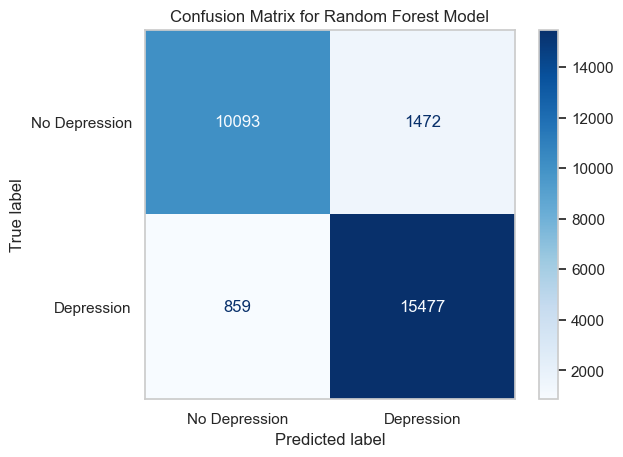

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
np.set_printoptions(suppress=True)  # This disables scientific notation
# Compute confusion matrix on the full dataset or a holdout test set
# (Here we're using the predictions from rf_best on the entire dataset X)
cm = confusion_matrix(y, y_pred_rf)

# Optionally, if you have a separate test set, do:
# cm = confusion_matrix(y_test, y_pred_rf_test)

# Print the confusion matrix values
print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Depression', 'Depression'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Random Forest Model")
# Remove the grid lines
plt.grid(False)
plt.show()

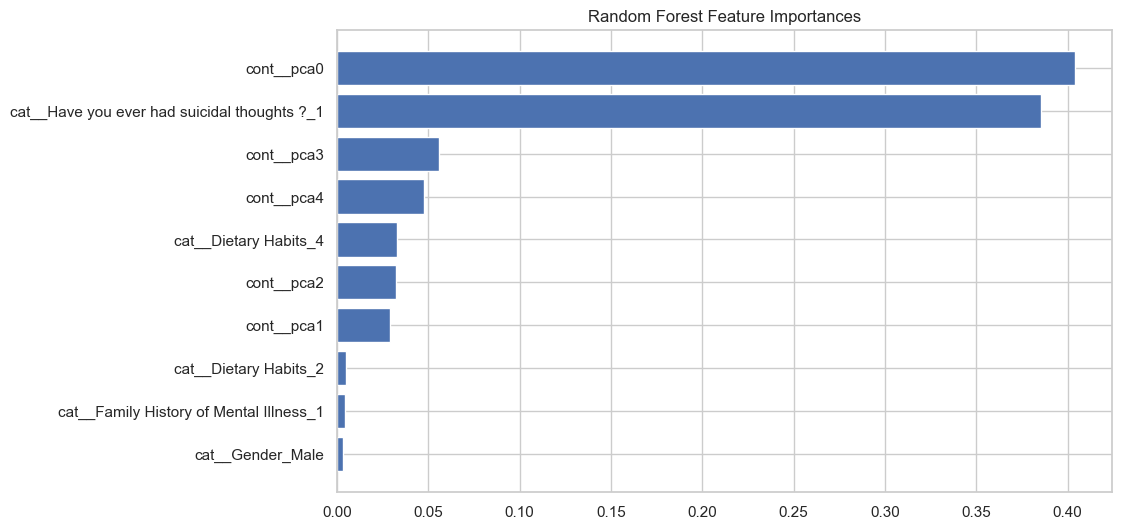

In [34]:
import matplotlib.pyplot as plt

# After training, get feature importances
importances = rf_best.named_steps['rf'].feature_importances_
# Get feature names from the preprocessor (note: after ColumnTransformer, feature names might be transformed)
# If you used OneHotEncoder, you'll have new feature names; you can extract them using:
feature_names = rf_best.named_steps['preprocessor'].get_feature_names_out()
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.show()




In [50]:
# Get the best Random Forest model from your pipeline
rf_model = rf_best.named_steps['rf']

# Get feature importances from the Random Forest
importances = rf_model.feature_importances_

# Retrieve the feature names from the preprocessor
# Note: get_feature_names_out() is available in recent versions of scikit-learn.
feature_names = rf_best.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for easier viewing
import pandas as pd
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance descending
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

print(feat_imp_df)


                                        Feature  Importance
0                                    cont__pca0    0.380133
8  cat__Have you ever had suicidal thoughts ?_1    0.334934
3                                    cont__pca3    0.072025
4                                    cont__pca4    0.065494
2                                    cont__pca2    0.050370
1                                    cont__pca1    0.047785
6                         cat__Dietary Habits_4    0.029682
7       cat__Family History of Mental Illness_1    0.006763
5                         cat__Dietary Habits_2    0.006580
9                              cat__Gender_Male    0.006235


In [48]:
# Access the PCA object from the continuous pipeline in your ColumnTransformer:
# Note: Adjust indices based on your pipeline structure.
pca = rf_best.named_steps['preprocessor'].transformers_[0][1].named_steps['pca']

# Get the loadings (components) from PCA.
loadings = pca.components_

# The order of features in 'continuous_features' is assumed to be preserved.
feature_names = continuous_features

# Create a DataFrame for easier viewing.
import pandas as pd
loadings_df = pd.DataFrame(loadings, columns=feature_names)

print("PCA Component Loadings:")
print(loadings_df)


PCA Component Loadings:
   Academic Pressure  Work/Study Hours  Financial Stress  Sleep Duration  \
0           0.629477          0.480124          0.581508       -0.183095   
1          -0.098637          0.104687         -0.077334       -0.494620   
2          -0.013226          0.009144          0.297253        0.815285   
3          -0.243986          0.863800         -0.398990        0.174102   
4           0.730976         -0.110845         -0.638996        0.163790   

       CGPA  
0 -0.039554  
1  0.853629  
2  0.496682  
3 -0.069394  
4  0.135074  


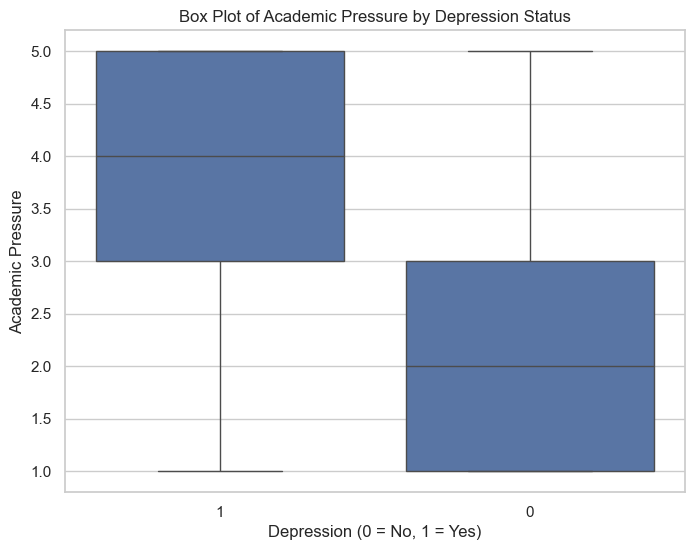

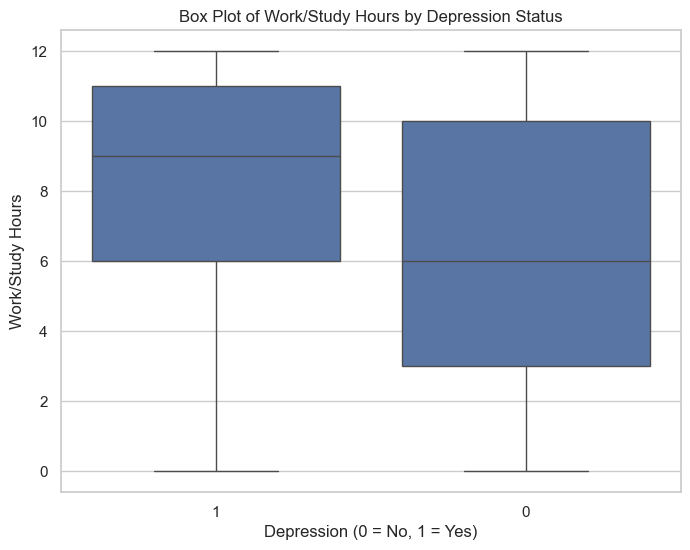

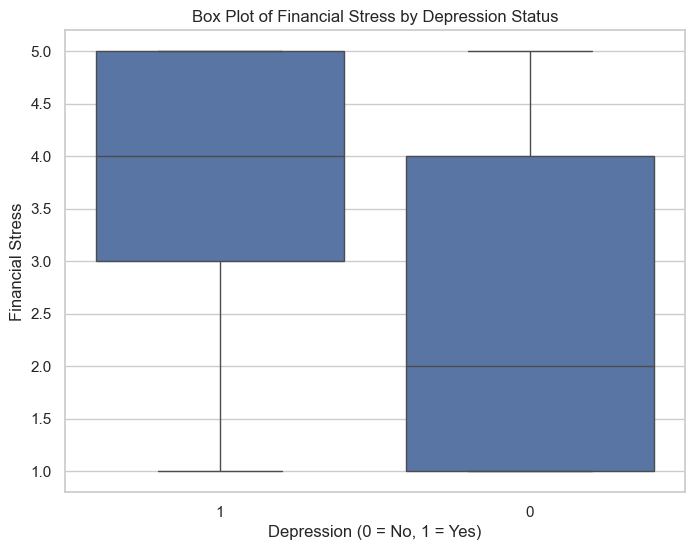

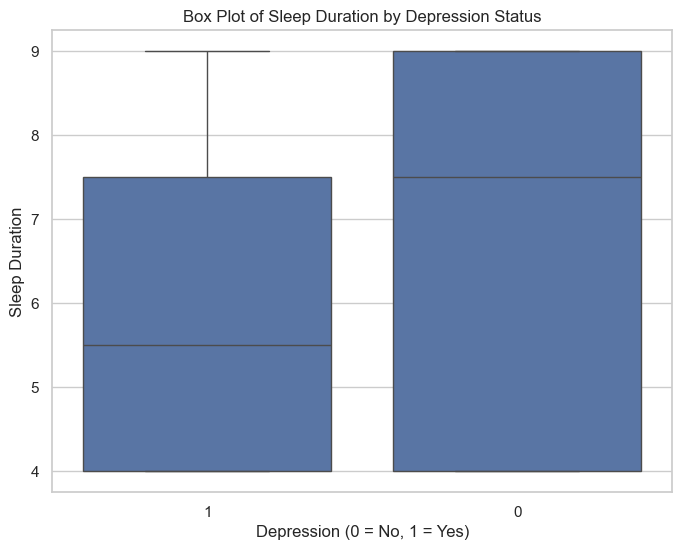

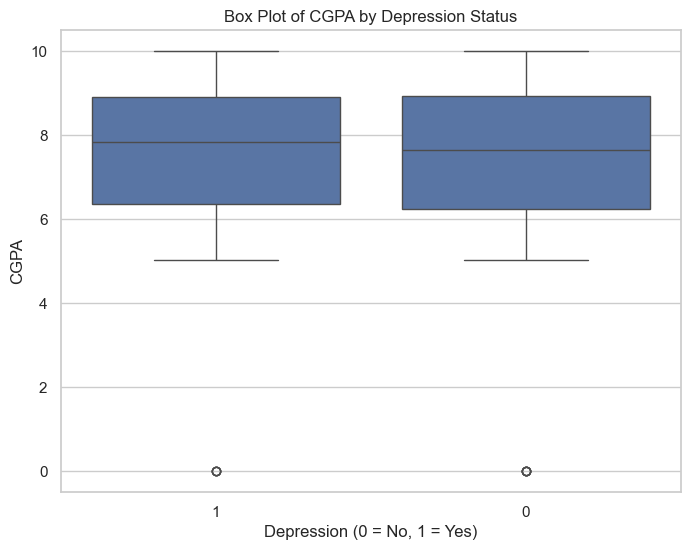

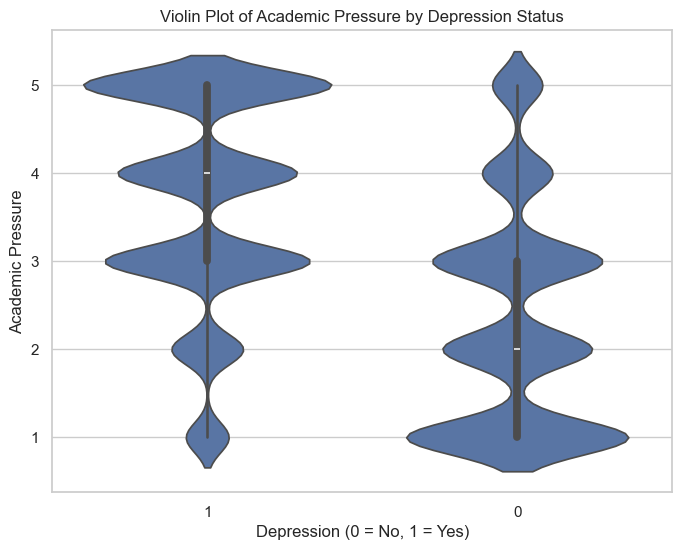

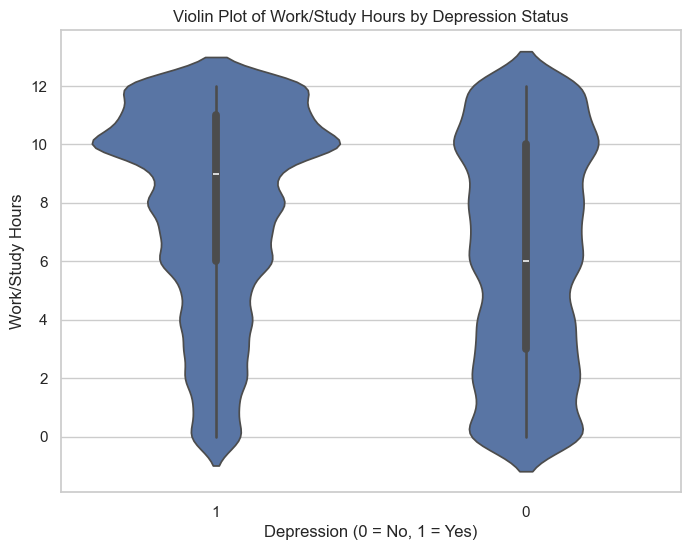

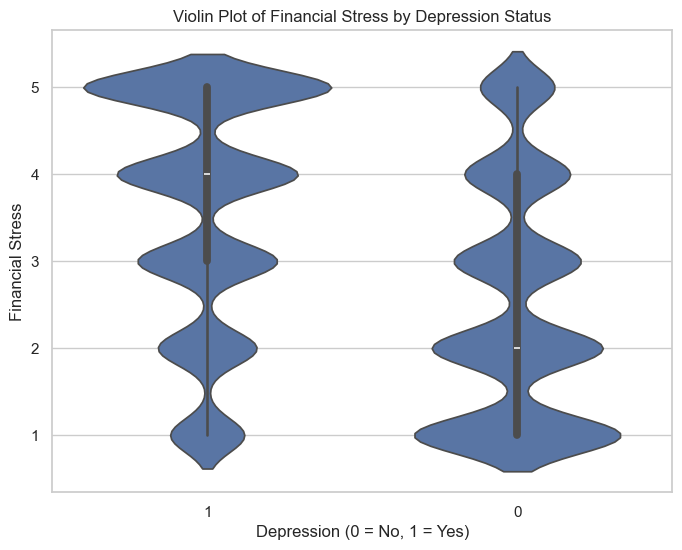

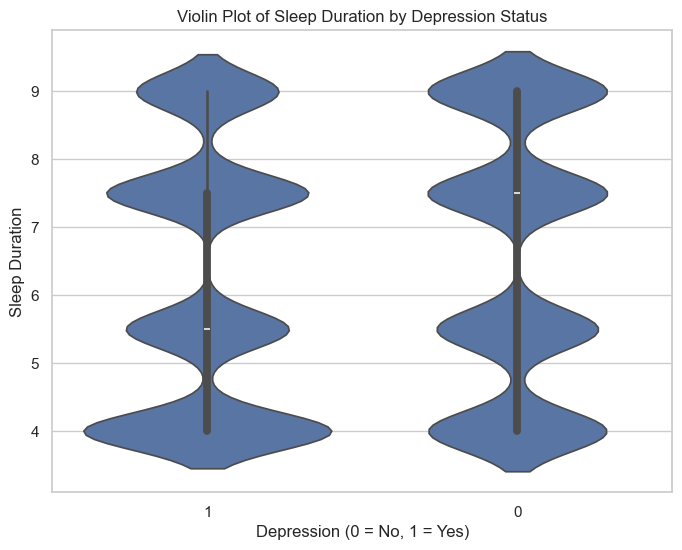

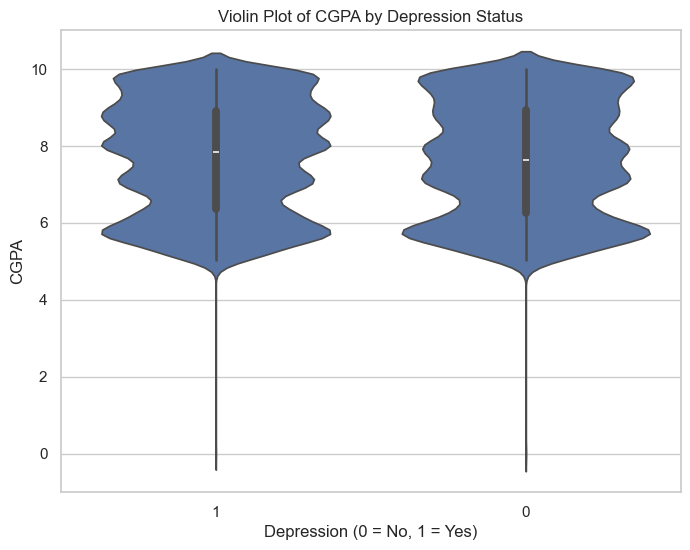

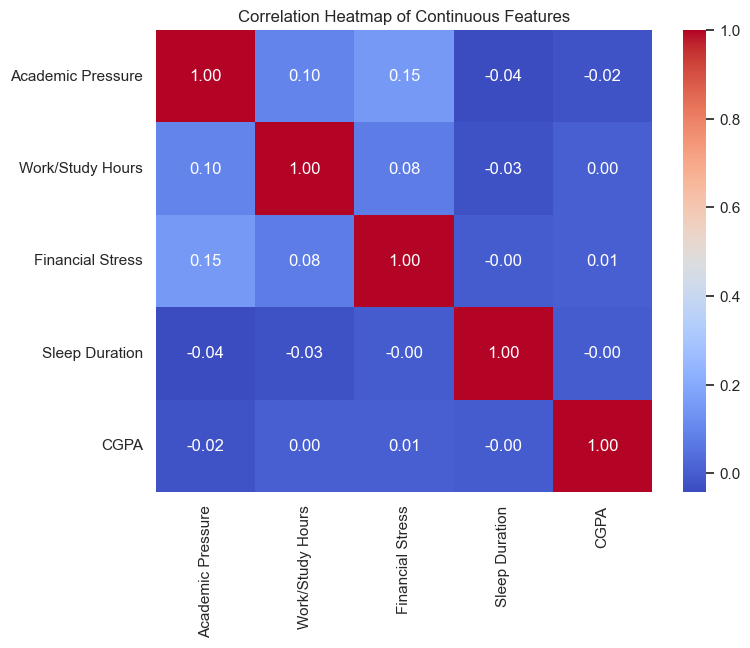

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Depression' is a categorical variable for plotting purposes
df['Depression'] = df['Depression'].astype(str)

# Box Plots: Compare the distribution of each continuous feature by Depression status.
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Depression', y=feature, data=df)
    plt.title(f"Box Plot of {feature} by Depression Status")
    plt.xlabel("Depression (0 = No, 1 = Yes)")
    plt.ylabel(feature)
    plt.show()

# Violin Plots: Visualize the full distribution of each continuous feature.
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Depression', y=feature, data=df)
    plt.title(f"Violin Plot of {feature} by Depression Status")
    plt.xlabel("Depression (0 = No, 1 = Yes)")
    plt.ylabel(feature)
    plt.show()

# Heatmap: Correlation heatmap among continuous features.
corr_matrix = df[continuous_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Continuous Features")
plt.show()
